# Subject: Data Science Foundation

## Session 13 - Correlation in Python.

### Assignment 1 -  Calculating Correlation for pandas Dataframe "Titanic"


- Considering the Correlation analysis presented in Demo 1 develop a new one for the data set “Titanic”. 
- Select the variables most appropriate and justify your option.
- Commit scripts in your GitHub account. You should export your your solution code (.ipynb notebook) and push it to your repository “DataScienceFoundations”.
- The following are the tasks that should complete and synchronize with your repository “DataScienceFoundations” until November 23. Please notice that this task will not be graded, however it’s important that you correctly understand and complete them in order to be sure that you won’t have problems with further assignments.

Guidelines:
- Clone the Git repository to get an initial code: 
https://github.com/FGutierresBTS/BTS_MasterInBigData.git
- Once you downloaded the repository to your local file system, go to the folder “BTS_MasterInBigData/ Session_13_DSF”. 
- Copy the folder “Session_13_DSF” into your local folder “DataScienceFoundations”. 
- In the folder “Session_13_DSF” you will see the files called: 
    -	BTS_DataScienceFoundations_Session13_Correlation_Individual_assignment.ipynb.
    -   "1_titanic_dataset.csv" (note: this dataset must be pre-processed).
- Import these files into Jupyter Notebook using the “Upload” button. 
- Open the imported script and put your code inside the notebook. 
- Export your Assignment *.ipynb notebook and push it to your repository “DataScienceFoundations”.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/Users/mariiashcherbiak/Downloads/BTS_MasterInBigData-master-10/Session_3_CDA/FileData/1_titanic_dataset.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [4]:
df.shape

(891, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are 177 missing values in Age. Replace by mean:

In [18]:
print(df.describe())


         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116e4ceb8>]], dtype=object)

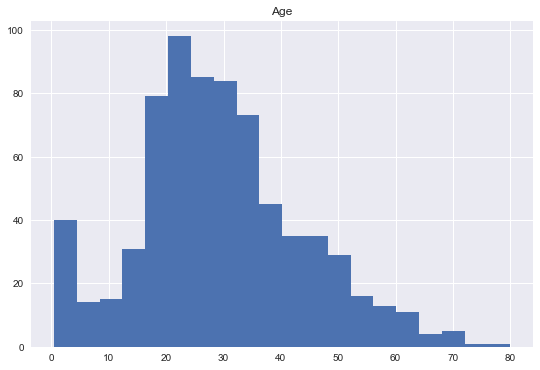

In [19]:
df.hist(column='Age',figsize=(9,6),bins=20) 

In [20]:
new_Age_var = np.where(df["Age"].isnull(), 29, df["Age"])     
df["Age"] = new_Age_var 
df["Age"].describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117179cf8>]], dtype=object)

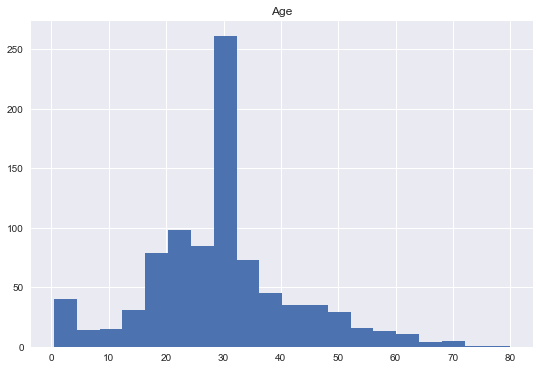

In [22]:
df.hist(column='Age',figsize=(9,6),bins=20) 

In [24]:
df.corr(method='spearman')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.037472,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.311679,-0.043019,-0.022801,-0.688032
Age,-0.037472,-0.311679,1.000000,-0.145831,-0.216794,0.120924
SibSp,0.088879,-0.043019,-0.145831,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.216794,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.120924,0.447113,0.410074,1.000000


In [13]:
import seaborn as sns

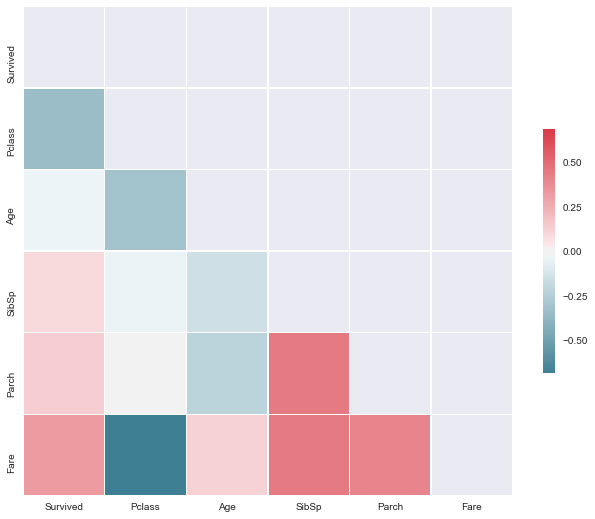

In [26]:
# Compute the correlation matrix

corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It does make sence that the correlation between Pclass and Fare is srtongly negative. The high Pclass value assumes the low Fare.

> Answer question here